In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad

[8 9 9 7]
2.0


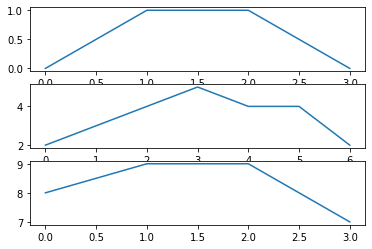

In [22]:
# first let's do some convolution to get used to the idea

a = [0, 1, 1, 0]
b = [2, 3, 4, 5, 4, 4, 2]

c = np.correlate(a, b)
print(c)

fig, axs = plt.subplots(3, 1)
axs[0].plot(a)
axs[1].plot(b)
axs[2].plot(c)

ar = np.trapz(a)
print(ar)

In [14]:
log46 = dalecLoad.load_DALEC_log('data/LOG_0046.dtf')

In [63]:
# let's get the spectra of a specific sample:

spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/LOG_0046.dtf')

sample_10 = log46.loc['10', :]
# use 601 steps so that it matches the RSR for superdoves
Lu_10 = dalecLoad.uniform_grid_spectra(sample_10, spect_wavelengths, param='Lu', nsteps=601)
Lsky_10 = dalecLoad.uniform_grid_spectra(sample_10, spect_wavelengths, param='Lsky', nsteps=601)
Ed_10 = dalecLoad.uniform_grid_spectra(sample_10, spect_wavelengths, param='Ed', nsteps=601)


,Pixel_no,Ed,Lu,Lsky
0,21,372.54,373.22,373.66
1,22,375.87,376.58,377.03
2,23,379.21,379.94,380.41
3,24,382.54,383.29,383.79
4,25,385.88,386.65,387.16
...,...,...,...,...
195,216,1020.72,1020.12,1027.34
196,217,1023.95,1023.33,1030.60
197,218,1027.19,1026.53,1033.85
198,219,1030.43,1029.74,1037.10


In [31]:
# load spectral response function for superdoves
RSR_doves = pd.read_csv('non-DALEC-data/RSR-Superdove.csv')
RSR_doves

,Wavelength (nm),Coastal-Blue response,Blue response,Green_i response,Green_ii response,Yellow response,Red response,Red-edge response,NIR response
0,400,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,401,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,402,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,403,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,404,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
596,996,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
597,997,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
598,998,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
599,999,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
coastalBlue = RSR_doves['Coastal-Blue response'].values
len(coastalBlue)

601

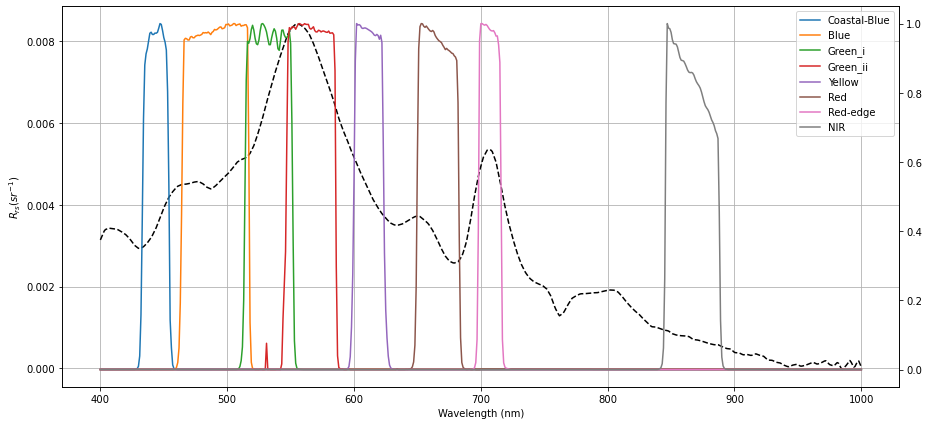

In [80]:
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()
ax.plot(Lu_10[:, 0], Lu_10[:, 1], 'k--', label='Lu')
ax2.plot(Lu_10[:, 0], RSR_doves['Coastal-Blue response'].values, label='Coastal-Blue')
ax2.plot(Lu_10[:, 0], RSR_doves['Blue response'].values, label='Blue')
ax2.plot(Lu_10[:, 0], RSR_doves['Green_i response'].values, label='Green_i')
ax2.plot(Lu_10[:, 0], RSR_doves['Green_ii response'].values, label='Green_ii')
ax2.plot(Lu_10[:, 0], RSR_doves['Yellow response'].values, label='Yellow')
ax2.plot(Lu_10[:, 0], RSR_doves['Red response'].values, label='Red')
ax2.plot(Lu_10[:, 0], RSR_doves['Red-edge response'].values, label='Red-edge')
ax2.plot(Lu_10[:, 0], RSR_doves['NIR response'].values, label='NIR')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$R_{rs} (sr^{-1}$)')
ax.grid()

ax2.legend()
plt.show()

In [53]:
def spectral_conv(R, S, x):
    '''
    returns the spectral convolution of spectral data, R with S, the spectral response function
    x are the wavelengths, which need to match both R and S (R and S should be same length and on same wavelength grid, x)
    see https://opg.optica.org/oe/fulltext.cfm?uri=oe-28-9-13801&id=431131 for details
    '''
    out = np.trapz(R * S, x=x) / np.trapz(S, x=x)
    return out

In [57]:
Lu_coastalBlue = spectral_conv(Lu_10[:, 1], coastalBlue, Lu_10[:, 0])
Lu_coastalBlue # can visually check on graph above that this value seems right

0.003485883573334014

In [55]:
# let's try a different band
blue = RSR_doves['Blue response'].values
Lu_blue = spectral_conv(Lu_10[:, 1], blue, Lu_10[:, 0])
Lu_blue # looks good to me!

0.004678354781490082

In [62]:
Lu_SD = []
for col in RSR_doves.columns[1:]:
    col_SR = RSR_doves[col].values
    Lu_SD.append(spectral_conv(Lu_10[:, 1], col_SR, Lu_10[:, 0]))
Lu_SD

[0.003485883573334014,
 0.004678354781490082,
 0.006688789783252944,
 0.007786219031401743,
 0.004385788420637346,
 0.003126214481682024,
 0.005074423915418143,
 0.0007372654079853173]

In [67]:
def SD_band_calc(RSR_doves, R, x):
    '''
    does spectral convolution for every superDoves band
    RSR_doves is the spectral response data for superDoves (cols = Wavelength (nm), Coastal-Blue response, Blue etc..)
    R is the reflectance data to convolve for each band
    x is the wavelength grid for R and each spectral response function in RSR_doves
    '''
    R_SD = []
    for col in RSR_doves.columns[1:]: # don't use first col as this is the wavelengths column
        col_SR = RSR_doves[col].values
        R_SD.append(spectral_conv(R, col_SR, x))
    return np.array(R_SD)

In [70]:
# for remote sensing reflectance calc, we ideally do the convolution before calcing Rrs

# first calc Lw
RHO = 0.028
Lw = Lu_10[:, 1] - (RHO * Lsky_10[:, 1])

# now do spectral conv for Lw and Ed
Lw_SD = SD_band_calc(RSR_doves, Lw, RSR_doves['Wavelength (nm)'].values)
Ed_SD = SD_band_calc(RSR_doves, Ed_10[:, 1], RSR_doves['Wavelength (nm)'].values)
# now calc Rrs
Rrs_SD = Lw_SD / Ed_SD
Rrs_SD

Rrs = (Lu_10[:, 1] - (RHO * Lsky_10[:, 1])) / Ed_10[:, 1]

In [89]:
SD_airthrey = pd.read_csv('non-DALEC-data/superDoveAirthrey-24May.csv', sep='\t')
SD_airthrey['avg'] = SD_airthrey.iloc[:, 1:].mean(axis=1)
SD_airthrey

,Wavelength,Pin 1,Pin 2,Pin 3,Pin 4,Pin 5,Pin 6,Pin 7,Pin 8,Pin 9,...,Pin 42,Pin 43,Pin 44,Pin 45,Pin 46,Pin 47,Pin 48,Pin 49,Pin 50,avg
0,443.661072,0.022050,0.027751,0.026901,0.021753,0.026272,0.032368,0.025791,0.025680,0.024051,...,0.026161,0.023050,0.016594,0.024458,0.021827,0.024384,0.021753,0.020233,0.021160,0.022747
1,492.301270,0.023974,0.033692,0.026838,0.024690,0.027943,0.027553,0.026480,0.027391,0.026089,...,0.025178,0.026154,0.028658,0.025731,0.024625,0.025178,0.025992,0.024039,0.024592,0.027377
2,532.734314,0.047399,0.048862,0.048629,0.046999,0.046434,0.047365,0.044869,0.050757,0.046900,...,0.048097,0.046600,0.046400,0.044669,0.042004,0.041771,0.043604,0.042937,0.045335,0.049621
3,565.765198,0.062663,0.078436,0.064864,0.063564,0.063130,0.065331,0.067163,0.070859,0.064464,...,0.065564,0.064631,0.058691,0.057522,0.056720,0.058591,0.061629,0.061395,0.062730,0.068948
4,611.647156,0.037999,0.042976,0.043149,0.044262,0.038869,0.042350,0.039392,0.043010,0.044367,...,0.042036,0.039949,0.039426,0.041967,0.040993,0.038800,0.041062,0.040505,0.040366,0.043201
5,666.443787,0.031432,0.033813,0.032695,0.030385,0.031287,0.034210,0.033741,0.034426,0.034101,...,0.028652,0.031648,0.030385,0.031937,0.030385,0.031793,0.030818,0.032550,0.028833,0.033189
6,706.962524,0.060132,0.076404,0.062287,0.061266,0.058770,0.067275,0.056386,0.077911,0.061682,...,0.061796,0.059716,0.055137,0.054039,0.043232,0.047975,0.051993,0.056121,0.059829,0.070831
7,865.511475,0.061513,0.055552,0.052493,0.062684,0.048207,0.056622,0.055246,0.061360,0.050504,...,0.052799,0.053054,0.049636,0.051830,0.048463,0.051779,0.053921,0.051167,0.054227,0.058624


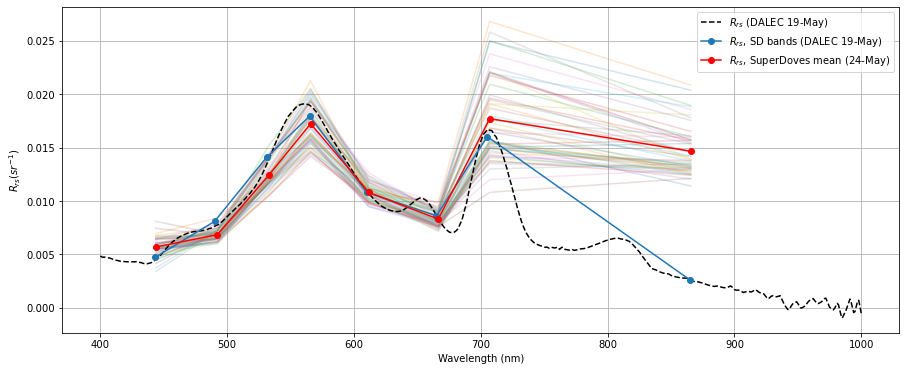

In [116]:
# superdoves wavelengths
SD_x = [443, 490, 531, 565, 610, 665, 705, 865]

fig, ax = plt.subplots(figsize=(15, 6))

for col in SD_airthrey.columns[1:-1]:
    ax.plot(SD_airthrey['Wavelength'].values, SD_airthrey[col].values/4, alpha=0.2)

ax.plot(RSR_doves['Wavelength (nm)'].values, Rrs, 'k--', label='$R_{rs}$ (DALEC 19-May)')
ax.plot(SD_x, Rrs_SD, marker='o', label='$R_{rs}$, SD bands (DALEC 19-May)')

ax.plot(SD_airthrey['Wavelength'].values, SD_airthrey['avg'].values/4, 
        marker='o', color='r', label='$R_{rs}$, SuperDoves mean (24-May)')
#ax.plot(SD_airthrey['Wavelength'].values, SD_airthrey['Pin 4'].values/4, label='$R_{rs}$ superDoves pin 4 24-May')


ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$R_{rs} (sr^{-1}$)')
ax.grid()
plt.show()

In [92]:
SD_airthrey['avg'].values

array([0.02274682, 0.02737672, 0.04962072, 0.06894843, 0.04320095,
       0.03318939, 0.07083082, 0.05862417])

In [102]:
SD_x

[443, 490, 531, 565, 665, 610, 705, 865]